In [2]:
#importing packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt



## Data Analysis

In [3]:
liver = pd.read_csv("C:/Users/HP/Downloads/input/Indian_Liver_Patient.csv")

In [4]:
liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,Liver_patients
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
liver.shape

(583, 11)

In [6]:
liver['Liver_patients'].value_counts()

1    416
2    167
Name: Liver_patients, dtype: int64

In [7]:
liver.describe(include='all')

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,Liver_patients
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [8]:
liver.columns


Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'Liver_patients'],
      dtype='object')

In [9]:
#check for null values
null_values = liver.isnull().sum()
null_values

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
Liver_patients      0
dtype: int64

### Although there are 4 null values in the Albumin and Globulin Ratio coulumn(alkphos)

### fill these null values with median / mean


In [10]:
liver['alkphos'].median()

0.93

In [11]:
liver=liver.fillna(0.93)

 ### filled with the null values with the median of that column

In [12]:
null_values =liver.isnull().sum()
null_values

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
Liver_patients      0
dtype: int64

### Here,liver_patient column represent, patient has the two values where one values represent the patients suffered from liver diseases and other values represent the patients donot suffered from liver diseases

### Now lets divide the female and male patients that are represent on dataset using countplot

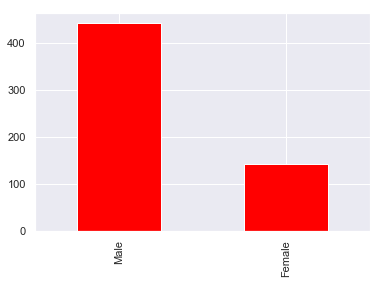

In [13]:
liver['gender'].value_counts().plot.bar(color='Red')

### Now let's indicate the number of people in dataset 1 and 2 

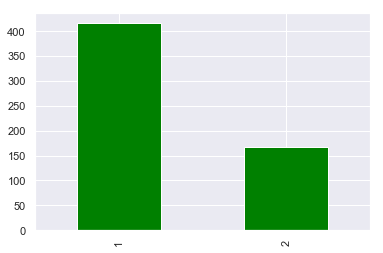

In [14]:
liver['Liver_patients'].value_counts().plot.bar(color="Green")

### Pairplot as seaborn

### let's check the view of pairplot of whole datasets

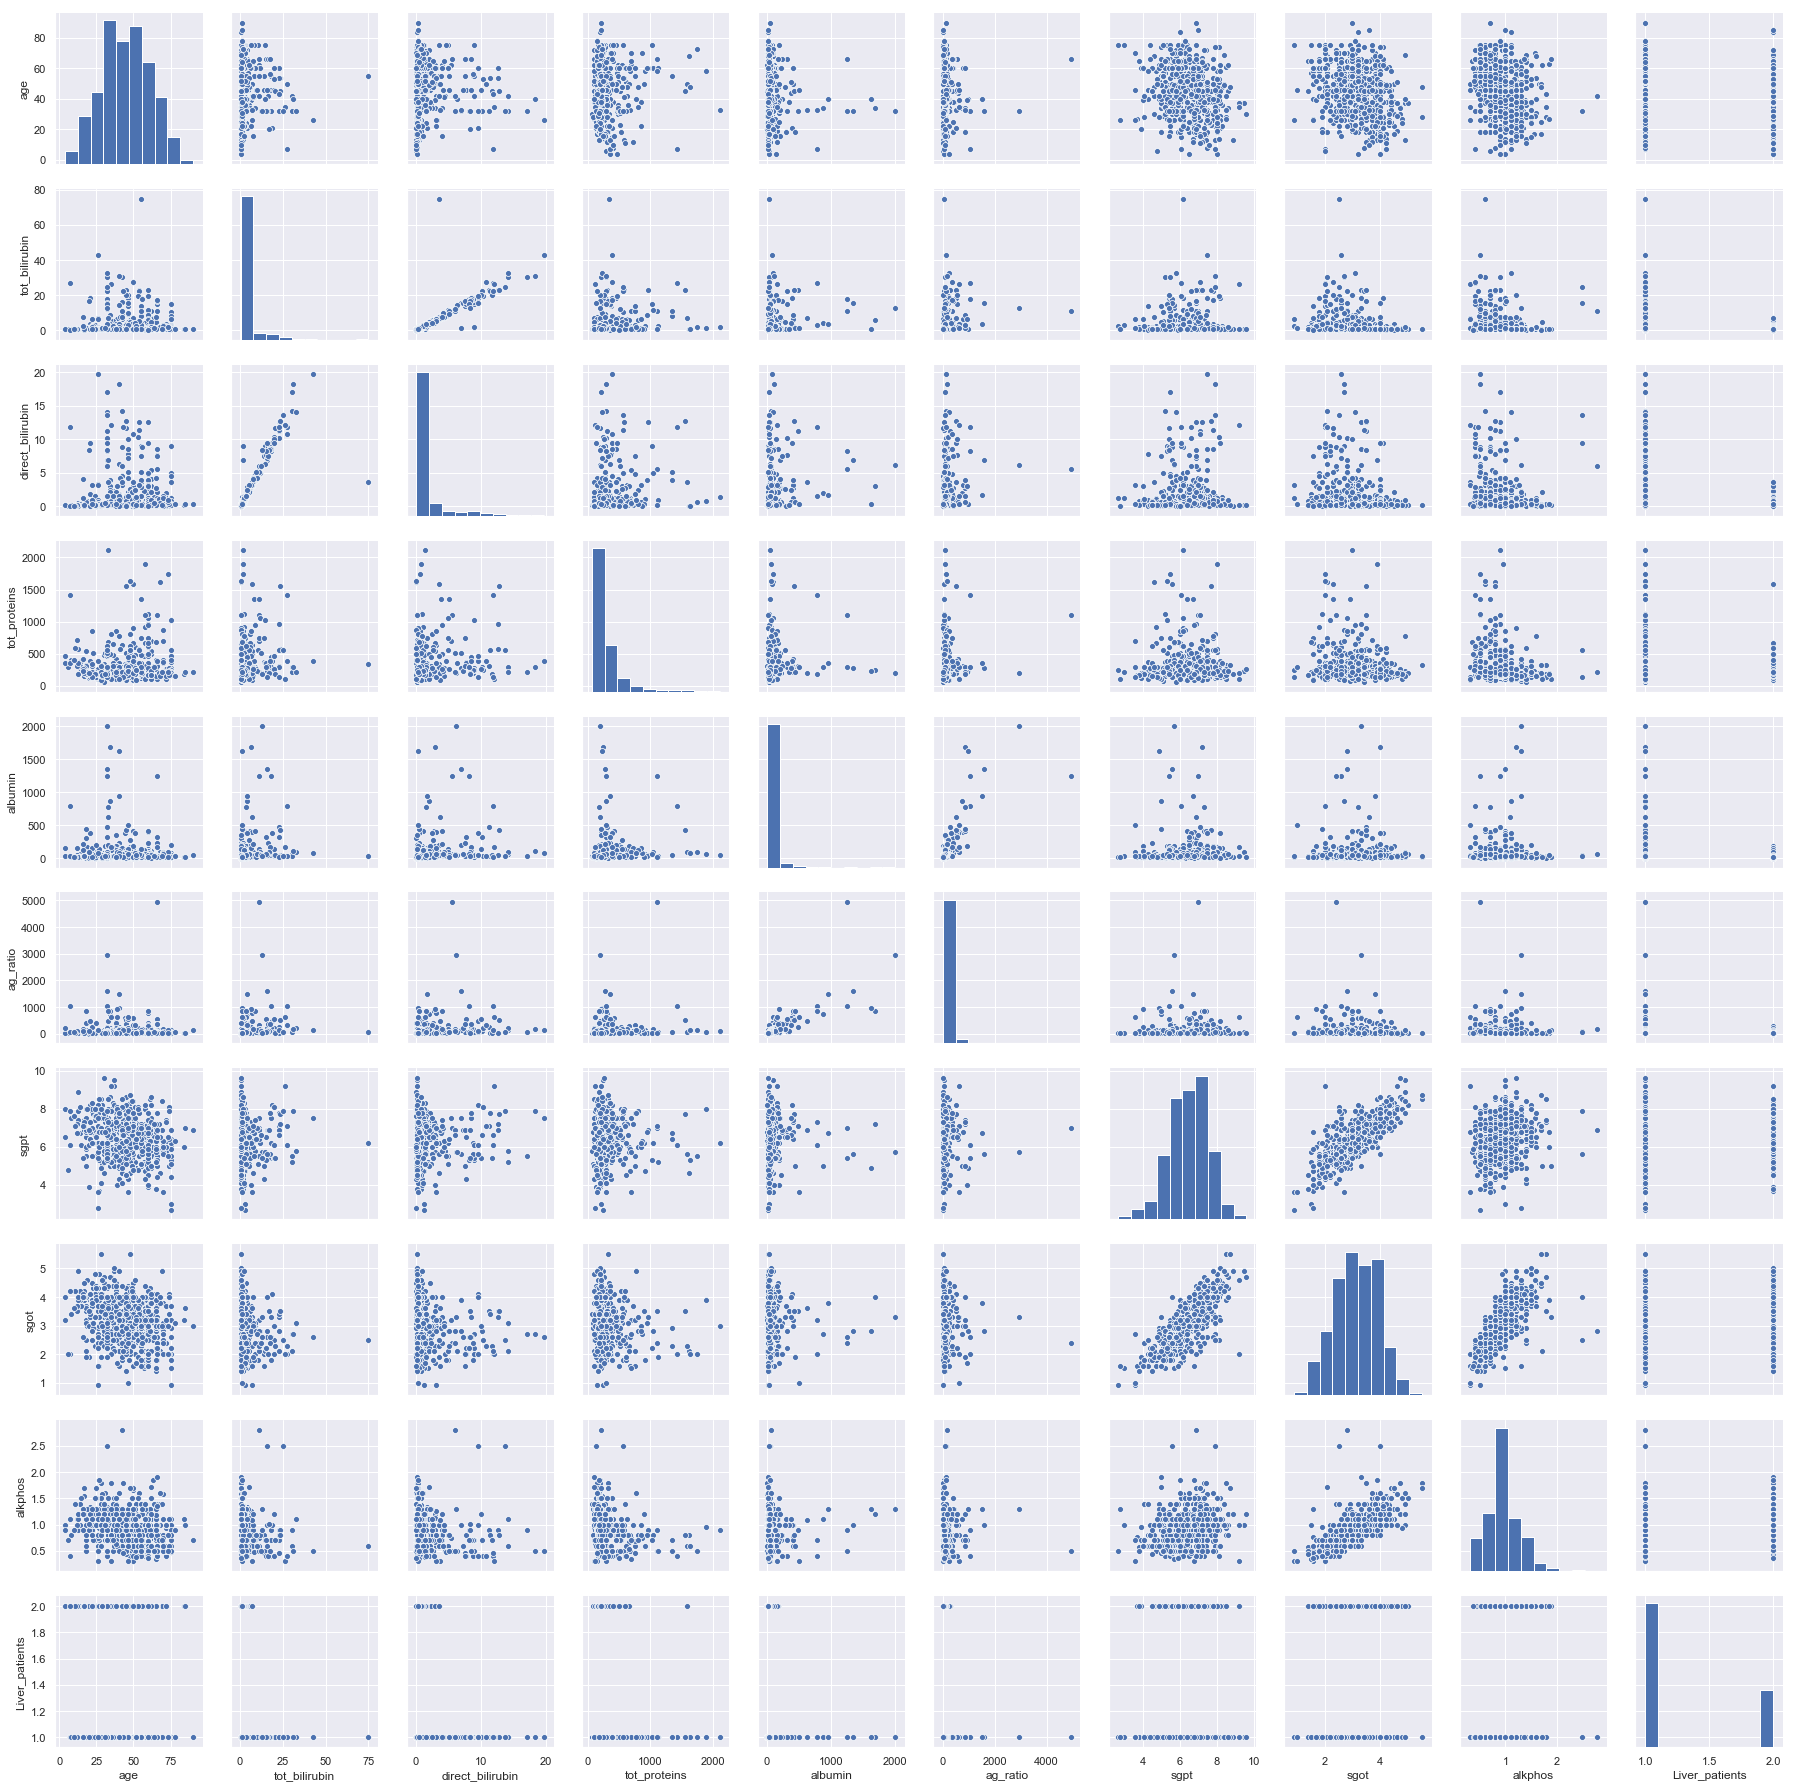

In [15]:
sns.pairplot(liver)

### Correlated Feature Check

In [16]:
def plot_corr(df, size=11):
    corr = liver.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick mark

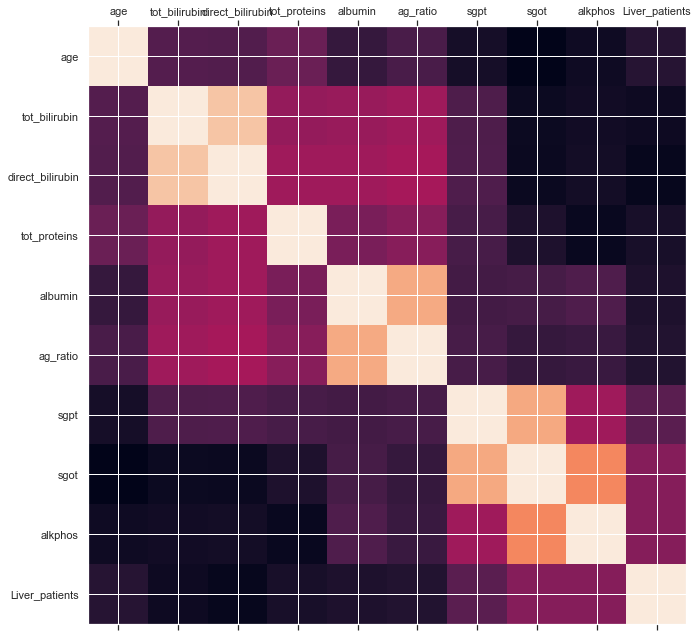

In [17]:
plot_corr(liver)

In [18]:
liver.corr()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,Liver_patients
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,-0.137351
tot_bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,-0.220208
direct_bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,-0.246046
tot_proteins,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,-0.184866
albumin,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,-0.163416
ag_ratio,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,-0.151934
sgpt,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,0.035008
sgot,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,0.161388
alkphos,-0.215968,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,0.162144
Liver_patients,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162144,1.000000


### Now Let us check correlation  features for all datasets  using a heatmap:

In [24]:
correlations = liver.corr()


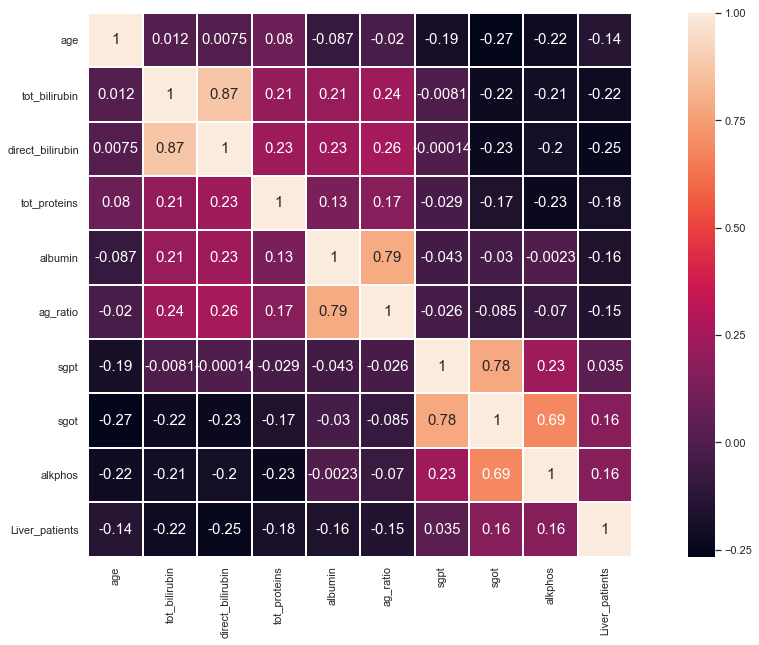

In [61]:
plt.figure(figsize=(20,10))
g=sns.heatmap(correlations ,vmin=None, vmax=None, cmap=None,  robust=False, annot=True, fmt='.2g', annot_kws={'size': 15}, linewidths=True, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=True, xticklabels='auto', yticklabels='auto', ) 

### Let's import pyswarms

In [1]:
import pyswarms as ps